<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 4: Example with fully connected neural networks - Overfitting

In this notebook, we will see examples related to the overfitting of networks and how to prevent and/or try to solve it. To see these concepts, we'll use the IMDB dataset, which consists of 25000 movie reviews (https://keras.io/api/datasets/imdb/).

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Next, we'll create our model, that witll consist of 2 hidden layers with 16 neurons and a layer with a single output neuron which will tell if the movie is good or bad. We'll use the `RMSprop` optimiser and the `binary_crossentropy` function, since we're dealing with a binary problem.

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 36ms/step - loss: 0.5444 - acc: 0.7420 - val_loss: 0.3315 - val_acc: 0.8818
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2633 - acc: 0.9131 - val_loss: 0.2958 - val_acc: 0.8821
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1988 - acc: 0.9323 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1620 - acc: 0.9468 - val_loss: 0.3393 - val_acc: 0.8660
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1446 - acc: 0.9510 - val_loss: 0.3133 - val_acc: 0.8791
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1165 - acc: 0.9625 - val_loss: 0.3715 - val_acc: 0.8633
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1092 - acc: 0.9638 - val_loss: 0.3578 - val_acc: 0.8709
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0965 - a

Notice how big the difference between the training accuracy and the validation accuracy is! How could we lower it down?

A first possibility is to make the model smaller, so it has less options to overfit the data:

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 33ms/step - loss: 0.6340 - acc: 0.6722 - val_loss: 0.4835 - val_acc: 0.8316
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4225 - acc: 0.8840 - val_loss: 0.3726 - val_acc: 0.8803
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3129 - acc: 0.9120 - val_loss: 0.3197 - val_acc: 0.8868
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2520 - acc: 0.9218 - val_loss: 0.2944 - val_acc: 0.8900
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2149 - acc: 0.9349 - val_loss: 0.2846 - val_acc: 0.8905
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1922 - acc: 0.9386 - val_loss: 0.2845 - val_acc: 0.8868
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1687 - acc: 0.9483 - val_loss: 0.2855 - val_acc: 0.8863
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1506 - a

Now, the results from training and validation are closer. If we plot the training curves, we'll see how the simple model behaves better than the complex one. This is because it has less capacity, that is, it's not able to learn the training data by heart, so it incurs in less overfitting.

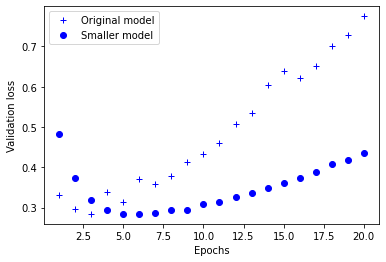

In [ ]:
from matplotlib import pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

To be sure, let's try now with an even bigger model.

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 57ms/step - loss: 0.6156 - acc: 0.7151 - val_loss: 0.2957 - val_acc: 0.8768
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2251 - acc: 0.9108 - val_loss: 0.3147 - val_acc: 0.8690
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1239 - acc: 0.9515 - val_loss: 0.3597 - val_acc: 0.8765
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0531 - acc: 0.9827 - val_loss: 0.4009 - val_acc: 0.8840
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0300 - acc: 0.9939 - val_loss: 0.4660 - val_acc: 0.8820
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0107 - acc: 0.9985 - val_loss: 0.4311 - val_acc: 0.8781
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.7320 - val_acc: 0.8794
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0842 - a

If we compare it to the original model, we'll notice how the bigger model incurs in more overfitting than the original.

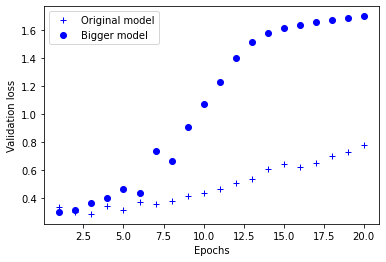

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

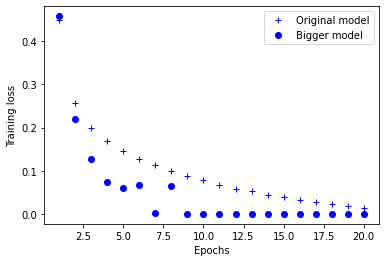

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### Weight regularization

We'll now see some methods that help reduce the overfitting. One of these methods is the weight regularisation.

We'll use the L2 regularisation, but there are different types, such as the L1 or the L1+L2, also known as elastic regularisation.

As we said, we'll use the L2 regularisation and a factor of 0.001, but you can try different values and see its effect. 

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5896 - acc: 0.7447 - val_loss: 0.3752 - val_acc: 0.8840
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3236 - acc: 0.9058 - val_loss: 0.3480 - val_acc: 0.8794
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2641 - acc: 0.9259 - val_loss: 0.3363 - val_acc: 0.8855
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2437 - acc: 0.9317 - val_loss: 0.3458 - val_acc: 0.8804
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2250 - acc: 0.9404 - val_loss: 0.3434 - val_acc: 0.8826
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2167 - acc: 0.9430 - val_loss: 0.3856 - val_acc: 0.8692
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2079 - acc: 0.9467 - val_loss: 0.4054 - val_acc: 0.8635
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2010 - a

Let's plot the training curves and see what the regularisation did:

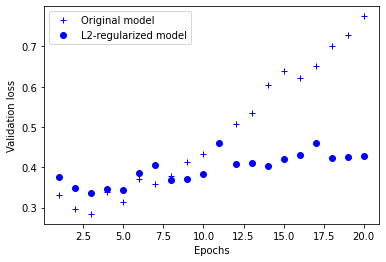

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Note how it was able to reduce the overfitting.

To use the L1 or L1+L2 regularisations you can use these classes:

```
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)
```

### Dropout

Another regularisation method is called Dropout, as you already saw in the theoretical documents of the course, and it's wildly used in practice.

We'll set the dropout rate to 0.5, but once again, feel free to try different values and see it's effect on the model behaviour:

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6641 - acc: 0.5961 - val_loss: 0.5674 - val_acc: 0.7660
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.5576 - acc: 0.7949 - val_loss: 0.4971 - val_acc: 0.8375
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4912 - acc: 0.8590 - val_loss: 0.4573 - val_acc: 0.8656
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4387 - acc: 0.8874 - val_loss: 0.4338 - val_acc: 0.8750
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4003 - acc: 0.9020 - val_loss: 0.4228 - val_acc: 0.8741
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3644 - acc: 0.9141 - val_loss: 0.4099 - val_acc: 0.8750
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3393 - acc: 0.9166 - val_loss: 0.4052 - val_acc: 0.8720
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3085 - a

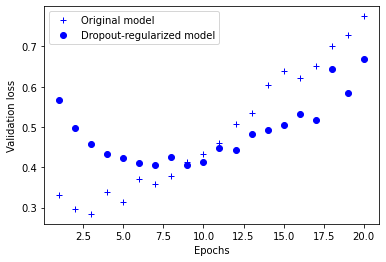

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Note how we were also able to reduce the overfitting using this technique.

### Early Stopping

The last method to deal with overfitting we'll see in this notebook is a technique called EarlyStopping. This technique does nothing but stop the training of the model once some condition is met. 

For example, it can monitor the validation loss and stop the training after 5 epochs without improvement. You have more information [here](https://keras.io/api/callbacks/early_stopping/).

Let's see how to implement it with Keras:

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es_model = models.Sequential()
es_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
es_model.add(layers.Dropout(0.5))
es_model.add(layers.Dense(16, activation='relu'))
es_model.add(layers.Dropout(0.5))
es_model.add(layers.Dense(1, activation='sigmoid'))

es_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


In [ ]:
# set up the early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]


es_model_hist = es_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test),
                             callbacks=callbacks) # add the callbacks

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6465 - acc: 0.6026 - val_loss: 0.4636 - val_acc: 0.8607
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4810 - acc: 0.7873 - val_loss: 0.3546 - val_acc: 0.8785
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3813 - acc: 0.8576 - val_loss: 0.2988 - val_acc: 0.8867
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3036 - acc: 0.8946 - val_loss: 0.2836 - val_acc: 0.8887
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2741 - acc: 0.9084 - val_loss: 0.2804 - val_acc: 0.8893
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2330 - acc: 0.9247 - val_loss: 0.3122 - val_acc: 0.8828
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2041 - acc: 0.9337 - val_loss: 0.3136 - val_acc: 0.8867
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1869 - a

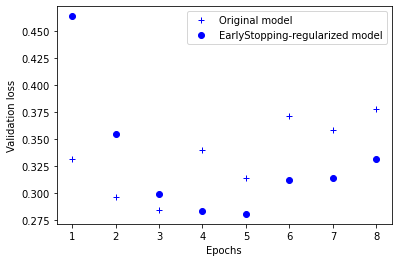

In [ ]:
es_model_val_loss = es_model_hist.history['val_loss']

plt.plot(epochs[:len(es_model_val_loss)], original_val_loss[:len(es_model_val_loss)], 'b+', label='Original model')
plt.plot(epochs[:len(es_model_val_loss)], es_model_val_loss, 'bo', label='EarlyStopping-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Notice how the callback stopped the training in epoch 8, after the model performed 3 epochs with no improvement on the validation loss. This method just prevents the network to continue training, which sometimes is somehow limited, since it could be possible to reach a better result continuing the training with some regularisation or dropout.

All these methods can be used individually or together.